In [217]:
import numpy as np
import matplotlib.pyplot as plt
import time


In [218]:
# def convert(imgs, labels, outfile, n):
#     imgf = open(imgs, "rb")
#     labelf = open(labels,"rb")
#     csvf = open(outfile, "w")
    
#     imgf.read(16)
#     labelf.read(8)
#     images = []
    
#     for i in range(n):
#         image = [ord(labelf.read(1))]
#         for j in range(28*28):
#             image.append(ord(imgf.read(1)))
#         images.append(image)
        
#     for image in images:
#         csvf.write(",".join(str(pix) for pix in image) + "\n")
#     imgf.close()
#     labelf.close()
#     csvf.close()


In [219]:
# mnist_train_x = r"C:\Users\Hp\Downloads\train-images.idx3-ubyte"
# mnist_train_y = r"C:\Users\Hp\Downloads\train-labels.idx1-ubyte"
# mnist_test_x =  r"C:\Users\Hp\Downloads\t10k-images.idx3-ubyte"
# mnist_test_y = r"C:\Users\Hp\Downloads\t10k-labels.idx1-ubyte"

In [220]:
# convert(mnist_train_x, mnist_train_y, r"C:\Users\Hp\Downloads\train.csv", 60000)
# convert(mnist_test_x, mnist_test_y,r"C:\Users\Hp\Downloads\test.csv", 10000)

In [221]:
train = np.loadtxt("train.csv", delimiter=",")

In [222]:
len(train[0])

785

In [223]:
label=train[:,784:]

In [224]:
train1=train[:,:784]

In [225]:
len(train1[0])

784

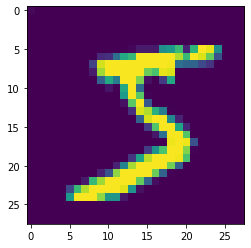

In [226]:
plt.imshow(train1[0].reshape(28, 28))

In [238]:
class DNN:

    def __init__ (self,input_layer_size,hidden_layer_size,num_labels,X, y ):
        self.input_layer_size = input_layer_size
        self.hidden_layer_size = hidden_layer_size
        self.num_labels=num_labels
        self.X=X
        self.y=y
      
        
    def sigmoid(self,z):
        return 1.0 / (1.0 + np.exp(-z))

    def sigmoidGradient(self,z):
        g = np.zeros(z.shape)
        g = sigmoid(z) * (1 - sigmoid(z))
        return g

    def ReLU(self, Z, derivative = False):
        if derivative:
            return Z>0
        return np.maximum(0,Z)

    def softmax(self, x, derivative=False):
        exps = np.exp(x-x.max())
        if derivative:
            return exps/np.sum(exps,axis=0)*(1-exps/np.sum(exps,axis=0))
        return exps/np.sum(exps,axis=0)
    
    def predict(self,Theta1, Theta2, X):
        # Useful values
        m = X.shape[0]
        num_labels = Theta2.shape[0]
        # You need to return the following variables correctly
        p = np.zeros(m)
        h1 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), X], axis=1), Theta1.T))
        h2 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), h1], axis=1), Theta2.T))
        p = np.argmax(h2, axis=1)
        return p
    
    def randInitializeWeights(self,L_in, L_out, epsilon_init=0.12):
        W = np.zeros((L_out, 1 + L_in))
        W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
        return W  
    
    def weight(self):
        initial_Theta1 = randInitializeWeights(self.input_layer_size, hidden_layer_size)
        initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

        # Unroll parameters
        initial_nn_params = np.concatenate([initial_Theta1.ravel(), initial_Theta2.ravel()], axis=0)
        return initial_nn_params
    
    def Back_propogation(self,nn_params,input_layer_size,hidden_layer_size,num_labels,X, y,lambda_):
        

    
        Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                        (hidden_layer_size, (input_layer_size + 1))) # 25 x 401

        Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                        (num_labels, (hidden_layer_size + 1))) 
        m = y.size
        a1 = np.concatenate([np.ones((m, 1)), X], axis=1) 
    
        z2 = np.dot(a1, Theta1.T)
        a2 = sigmoid(z2)

        a2 = np.concatenate([np.ones((m, 1)), a2], axis=1) 
        
        z3 = np.dot(a2, Theta2.T) 
        a3 = sigmoid(z3)  
        
        y_matrix = y.reshape(-1)
#         print(y_matrix)
#         print(num_labels)
        y_matrix = np.eye(num_labels)[y_matrix.astype(int)]
            

        J = (-1/m) * (np.sum(y_matrix * np.log(a3) + (1-y_matrix) * np.log(1-a3)))
    
    
        Reg = (lambda_/(2*m)) * (np.sum(np.square(Theta1[:, 1:])) + np.sum(np.square(Theta2[:, 1:])))
        J = J + Reg
    
        # Part 2: Backpropagation

        # Implementing the vectorized approach
        # Step 1
        # Comes from the forward propagation process(Part 1)
    
        # Step 2
        d3 = a3 - y_matrix  # 5000 x 10
        

        d2 = np.dot(d3, Theta2[:, 1:]) * sigmoidGradient(z2)  # 5000 x 25
  
        Delta1 = np.dot(d2.T, a1)  # 25 x 401
        Delta2 = np.dot(d3.T, a2)  # 10 x 26
        
        # Step 5
        Theta2_grad = (1/m) * Delta2
        Theta1_grad = (1/m) * Delta1
    
 
        Theta2_grad[:, 1:] = Theta2_grad[:, 1:] + (lambda_/m) * Theta2[:, 1:]
        Theta1_grad[:, 1:] = Theta1_grad[:, 1:] + (lambda_/m) * Theta1[:, 1:]
        
        # ================================================================
        # Unroll gradients
        # grad = np.concatenate([Theta1_grad.ravel(order=order), Theta2_grad.ravel(order=order)])
        grad = np.concatenate([Theta1_grad.ravel(), Theta2_grad.ravel()])

        return J, grad
    
    def train(self,X,y):
        
        from scipy import optimize
        options= {'maxiter': 2}
        initial_nn_params=self.weight()
        #  You should also try different values of lambda
        lambda_ = 1
        self.X=X
        self.y=y
        # Create "short hand" for the cost function to be minimized
        costFunction = lambda p:self.Back_propogation(p, input_layer_size,
                                        hidden_layer_size,
                                        num_labels,X,y, lambda_)

        # Now, costFunction is a function that takes in only one argument
        # (the neural network parameters)
        res = optimize.minimize(costFunction,
                        initial_nn_params,
                        jac=True,
                        method='TNC',
                        options=options)

    # get the solution of the optimization
        nn_params = res.x
        
    # Obtain Theta1 and Theta2 back from nn_params
        Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                    (hidden_layer_size, (input_layer_size + 1)))

        Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                    (num_labels, (hidden_layer_size + 1)))
        
        pred = predict(Theta1, Theta2, X)
        # print(pred)
        print('Training Set Accuracy: %f' % (np.mean(pred == y) * 100))
        
        return Theta1,Theta2
    



    

In [239]:
input_layer_size  = 784 
hidden_layer_size = 25 
num_labels = 10    
x=DNN(input_layer_size,hidden_layer_size,num_labels,train1,label)

In [240]:
theta1,theta2=x.train(train1,label)

C:\Users\Hp\AppData\Local\Temp\ipykernel_3152\2831633526.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


Training Set Accuracy: 100.000000


In [230]:
test = np.loadtxt("test.csv", delimiter=",")

In [241]:
labels_test=test[:,784:]

In [242]:
data_test=test[:,:784]

In [243]:
p=x.predict(theta1,theta2,data_test)

C:\Users\Hp\AppData\Local\Temp\ipykernel_3152\2831633526.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))


In [244]:
print('Training Set Accuracy: %f' % (np.mean(p == labels_test) * 100))

Training Set Accuracy: 100.000000
